# การเปรียบเทียบประสิทธิภาพระหว่าง models

In [1]:
import sys
sys.version

'3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Load ค่า Accuracy, F1 Score, Precision, และ Recall ที่ได้จากการประเมิน classification models ได้แก่ Logistic Regression, Decision Tree, Naïve Bayes, และ Random Forest:

In [3]:
df_model_baseline = pd.read_csv('./eval_results/eval_results_baseline.csv',index_col=0)
df_model_pca = pd.read_csv('./eval_results/eval_results_PCA.csv',index_col=0)
df_model_lda = pd.read_csv('./eval_results/eval_results_LDA.csv',index_col=0)

## เปรียบเทียบค่า Accuracy, F1 Score, Precision, และ Recall ของ models ต่าง ๆ

In [4]:
df_model_compare = pd.concat([df_model_baseline, df_model_pca, df_model_lda], axis=1)
df_model_compare

,Logit,NB,DT,RF,Logit_PCA,NB_PCA,DT_PCA,RF_PCA,Logit_LDA,NB_LDA,DT_LDA,RF_LDA
Accuracy,0.890168,0.859406,0.862222,0.908076,0.880856,0.834464,0.863462,0.910193,0.887486,0.889027,0.844033,0.844202
F1 Score,0.750793,0.707826,0.696616,0.794613,0.723964,0.511899,0.699934,0.798159,0.738962,0.751913,0.654903,0.656183
Precision,0.773736,0.669688,0.696092,0.805832,0.763167,0.773340,0.698048,0.814365,0.780180,0.762966,0.657586,0.657130
Recall,0.729172,0.750571,0.697141,0.783703,0.688591,0.382566,0.701830,0.782586,0.701881,0.741175,0.652242,0.655239


แสดงกราฟเปรียบเทียบค่า Accuracy, F1 Score, Precision, และ Recall ระหว่างก่อนและหลังการลดขนาดมิติข้อมูลโดยใช้เทคนิค Principal Component Analysis (PCA) และ Linear Discriminant Analysis (LDA):

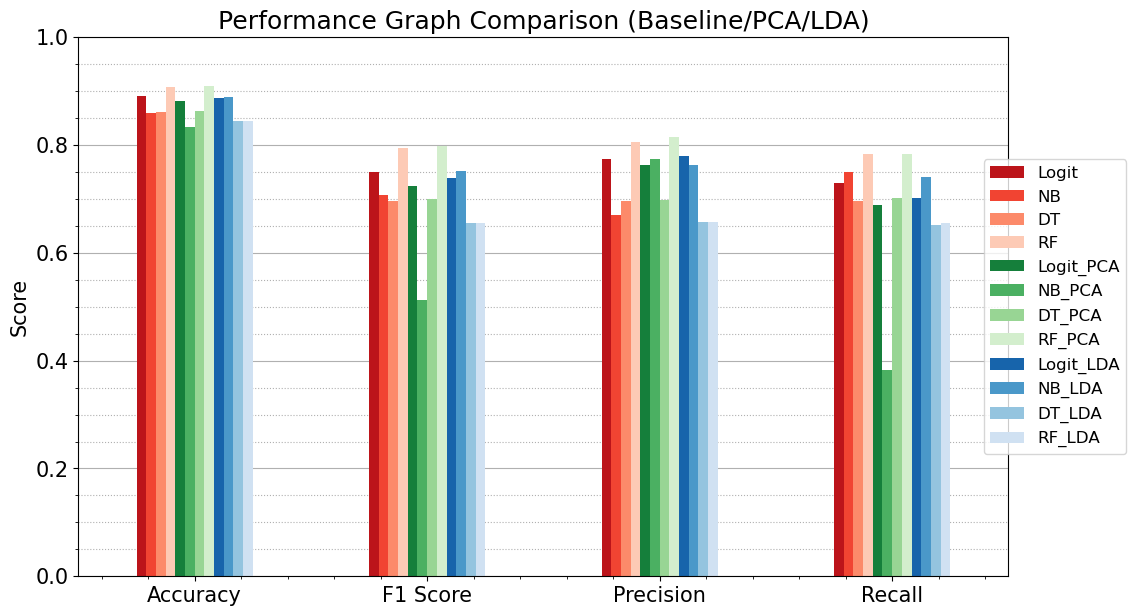

In [5]:
cmap1 = plt.cm.Reds
cmap2 = plt.cm.Greens
cmap3 = plt.cm.Blues
colors = [*cmap1(np.linspace(.8, .2, 4)),
          *cmap2(np.linspace(.8, .2, 4)),
          *cmap3(np.linspace(.8, .2, 4))]


ax = df_model_compare.plot(
    kind='bar', color=colors, rot=0,
    ylim=(0,1), figsize = (12,7), fontsize=15
)
ax.set_axisbelow(True)
ax.grid(linestyle='-', axis='y')
ax.legend(fontsize=12, loc='center', bbox_to_anchor=(1.05,0.5))

plt.minorticks_on()
plt.grid(which='minor', axis='y',ls=':')
plt.ylabel('Score',fontsize=15)
plt.title('Performance Graph Comparison (Baseline/PCA/LDA)', fontsize=18)
plt.savefig('./img/graph_PCA_LDA')
plt.show()

กราฟสีแดงคือ baseline models, สีเขียวคือ Principal Component Analysis (PCA) models, และสีน้ำเงินคือ Linear Discriminant Analysis (LDA) models

หลังทำ **PCA** แล้วพบว่า F1 Score ของ:
- Model ตระกูล tree-based ทำคะแนนได้ดีขึ้น: **Decision Tree** (จาก 69.7% เพิ่มเป็น 70.0%), **Random Forest** (จาก 79.5% เพิ่มเป็น 80.0%)
- Model ตัวอื่นทำคะแนนได้แย่ลง: **Logistic Regression** (จาก 75.1% ลดเหลือ 72.4%), **Naïve Bayes** (จาก 70.8% ลดเหลือ 51.2%)

หลังทำ **LDA** แล้วพบว่า F1 Score ของ:
- Model ตัวที่ทำคะแนนได้ดีขึ้น: **Naïve Bayes** (จาก 70.8% เพิ่มเป็น 75.2%)
- Model ตัวที่ทำคะแนนได้แย่ลง: **Logistic Regression** (จาก 75.1% ลดเหลือ 74.0%), **Decision Tree** (จาก 69.7% ลดเหลือ 65.5%), **Random Forest** (จาก 79.5% ลดเหลือ 65.6%)

นั่นคือ Random Forest หลังทำ PCA แล้ว ได้ค่า F1 Score สูงที่สุดและสูงกว่าก่อนทำ PCA อีกด้วย โดยมีคะแนนจาก 79.5% (ก่อนทำ PCA) เพิ่มเป็น 80.0% (หลังทำ PCA)

หมายเหตุ:

ค่า F1 Score เปรียบเทียบเนื่องจากเป็นค่า balance ของ Precision (จำนวนที่ทายถูกว่า positive ต่อจำนวนที่ทายว่า positive ทั้งหมด) กับ Recall (จำนวนที่ทายถูกว่า positive ต่อจำนวนที่เป็น positive จริง ๆ) จึงเหมาะสำหรับวัดประสิทธิภาพในกรณีที่ชุดข้อมูลไม่สมดุล (imbalanced dataset)

ค่า Accuracy วัดเพียงสัดส่วนที่ทำนายถูกเท่านั้น จึงเหมาะกับกรณีที่ชุดข้อมูลสมดุล (balanced dataset) มากกว่า

ดังนั้น งานชิ้นนี้จะใช้ค่า F1 Score เพื่อเปรียบเทียบ

## เปรียบเทียบระยะเวลาที่อัลกอริทึมใช้ในการทำงาน

แสดงกราฟเปรียบเทียบระยะเวลาที่อัลกอริรึมใช้ในการทำงาน ระหว่างก่อนและหลังการลดขนาดมิติข้อมูลโดยใช้เทคนิค Principal Component Analysis (PCA) และ Linear Discriminant Analysis (LDA):

In [6]:
columns = ['Logit','Naïve Bayes','Decision Tree','Random Forest']
rows = ['Baseline','PCA (n=30)','LDA (n=1)']
values = [[5,0.08,33,130],[0.25,0.016,5,54],[0.016,0.016,0.3,18]]

df_running_time = pd.DataFrame(values,rows,columns)

In [7]:
df_running_time

,Logit,Naïve Bayes,Decision Tree,Random Forest
Baseline,5.000,0.080,33.0,130
PCA (n=30),0.250,0.016,5.0,54
LDA (n=1),0.016,0.016,0.3,18


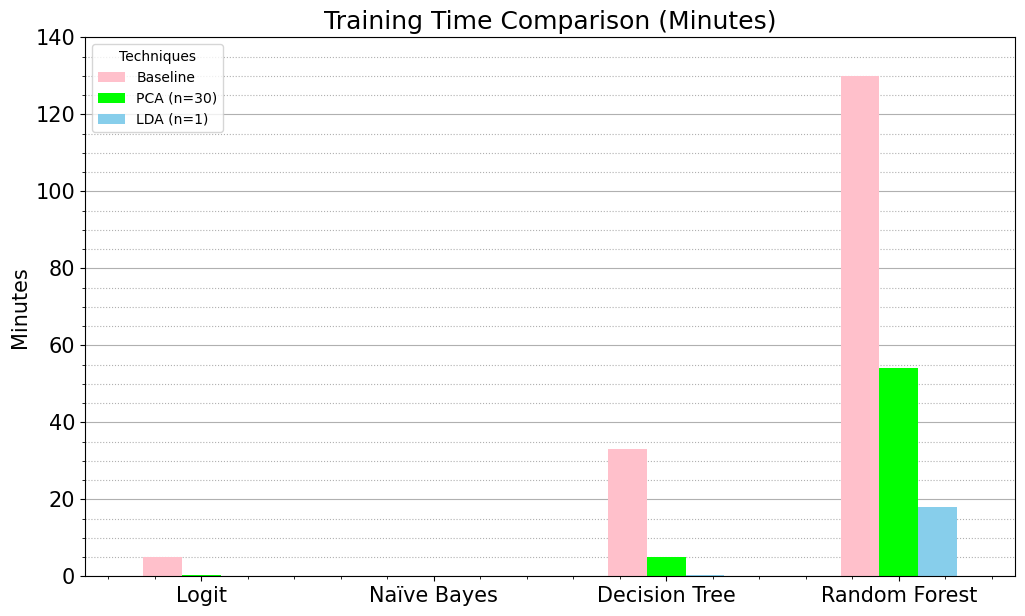

In [8]:
ax = df_running_time.T.plot(
    kind='bar', color=['pink','lime','skyblue'], rot=0,
    figsize = (12,7), fontsize=15
)
ax.set_axisbelow(True)
ax.grid(linestyle='-', axis='y')
ax.legend(fontsize=12)

plt.minorticks_on()
plt.grid(which='minor', axis='y',ls=':')
plt.ylim([0,140])
plt.ylabel('Minutes', fontsize=15)
plt.title('Training Time Comparison (Minutes)', fontsize=18)
plt.legend(title='Techniques')
plt.savefig('./img/running_time_PCA_LDA')
plt.show()

ทุก models หลังทำ PCA กับ LDA แล้ว ใช้ระยะเวลาในการทำงานลดลงอย่างมาก:
- Logistic Regression จากเดิมใช้เวลา 5 นาที, หลังทำ PCA และ LDA ลดเหลือไม่ถึง 1 นาที
- Naïve Bayes ทั้งก่อนและหลังทำ PCA และ LDA ใช้เวลาไม่ถึง 1 นาที เนื่องจากอัลกอริทึมใช้หลักความน่าจะเป็นของ Bayes’ Theorem จึงทำงานได้เร็วมากอยู่แล้ว
- Decision Tree จากเดิมใช้เวลา 33 นาที, หลังทำ PCA ลดเหลือ 5 นาที, หลังทำ LDA ลดเหลือไม่ถึง 1 นาที
- Random Forest จากเดิมใช้เวลา 130 นาที, หลังทำ PCA ลดเหลือ 54 นาที, หลังทำ LDA ลดเหลือ 18 นาที

## สรุป

สำหรับชุดข้อมูลนี้ การลดมิติข้อมูลโดยใช้ Principal Component Analysis (PCA) กับ Random Forest ได้ผลลัพธ์ที่ดีที่สุด (ทั้งลดเวลาและเพิ่มประสิทธิภาพ):
1) ลดระยะเวลาการทำงานจาก 2 ชั่วโมง 10 นาที  เหลือเพียง 54 นาที
2) เพิ่มประสิทธิภาพความแม่นยำ F1 Score ของ Random Forest จาก 79.5% เพิ่มเป็น 80.0%

ทดสอบอัลกอริทึมโดยใช้ CPU รุ่น AMD Ryzen 5 PRO 3500U

**ตารางอธิบายความหมายของค่า Accuracy, F1 Score, Precision, และ Recall:**

|Evaluation Metrics| |
|:-:|---|
|$$Accuracy = \frac{TN+TP}{TP+TN+FP+FN}$$ | (ทายถูก) / (ทั้งหมด) <br>ใช้ดีกรณีที่ dataset มี pos. กับ neg. พอๆกัน (Balanced Dataset) |
|$$Precision = \frac{TP}{TP+FP}$$ | ทายถูกว่า positive / ทายว่า positive ทั้งหมด |
|$$Recall = \frac{TP}{TP+FN}$$ | ทายถูกว่า positive / ความจริงที่เป็น positive ทั้งหมด |
|$$F1 Score = 2\times\frac{Precision\times Recall}{Precision+Recall}$$ | ค่า balance ของ Precision และ Recall <br>หลายงานวิจัยใช้ค่านี้ เพราะบาง dataset ค่า Accuracy วัดผลได้ไม่ดี|